In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [5]:
data = pd.read_csv("D:/CNTT/Document/Nam 3/HK2/KHAI PHÁ DỮ LIỆU/FinalProject/Tiền xử lý/data_resaamble.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61128 entries, 0 to 61127
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             61128 non-null  int64  
 1   Sex                    61128 non-null  int64  
 2   GeneralHealth          61128 non-null  float64
 3   PhysicalHealthDays     61128 non-null  float64
 4   MentalHealthDays       61128 non-null  float64
 5   PhysicalActivities     61128 non-null  int64  
 6   SleepHours             61128 non-null  float64
 7   HadAngina              61128 non-null  int64  
 8   HadStroke              61128 non-null  int64  
 9   HadAsthma              61128 non-null  int64  
 10  HadSkinCancer          61128 non-null  int64  
 11  HadCOPD                61128 non-null  int64  
 12  HadDepressiveDisorder  61128 non-null  int64  
 13  HadKidneyDisease       61128 non-null  int64  
 14  HadArthritis           61128 non-null  int64  
 15  Ha

In [9]:
data = data.iloc[:, 1:]  
data.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'SmokerStatus',
       'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'BMI',
       'AlcoholDrinkers', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos',
       'HadHeartAttack'],
      dtype='object')

In [10]:
data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,SmokerStatus,RaceEthnicityCategory,AgeCategory,HeightInMeters,BMI,AlcoholDrinkers,PneumoVaxEver,HighRiskLastYear,CovidPos,HadHeartAttack
0,1,1.0,5.0,0.0,1,8.0,1,0,0,1,...,3,4,4.0,1.75,24.37,0,1,0,2,1
1,1,2.0,5.0,0.0,1,5.0,0,0,0,1,...,0,4,6.0,1.88,32.74,0,1,0,0,1
2,1,2.0,0.0,0.0,1,6.0,1,0,0,0,...,2,4,0.0,1.78,22.67,0,1,0,0,1
3,1,2.0,3.0,12.5,1,5.0,1,0,0,0,...,2,0,5.0,1.85,36.02,0,0,0,2,1
4,1,2.0,0.0,0.0,1,8.0,1,1,0,0,...,3,4,5.0,1.78,30.13,0,1,0,0,1


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
data_pca = pca.fit_transform(data)

In [15]:
data_pca_df = pd.DataFrame(data_pca)
print(data_pca_df.head())

         0         1         2         3         4         5         6   \
0 -3.634002  1.988300 -3.442780  0.682230 -0.802036 -0.164493  0.844015   
1  2.782452 -3.161624 -2.061496  2.483079  1.854277 -1.461820  1.375545   
2 -7.628977  0.086932 -2.127859 -4.075238  1.394827 -0.545608  0.626469   
3  8.965297 -0.190698  7.830999 -2.761468  2.166978  2.559927 -0.693670   
4 -1.871422 -4.596150  0.134970  0.262916 -0.961563 -0.507447  0.509770   

         7         8         9         10        11        12        13  \
0 -2.518610  0.696181  0.335950 -0.541416  0.313111 -0.024558 -0.106928   
1  1.842605  0.342008 -0.003718 -0.245063  0.576948 -0.081263 -0.509472   
2  0.133412 -0.230311 -0.553892 -0.566149  0.576358 -0.283787 -0.066772   
3  0.231372  1.288470 -0.313238 -1.067085  0.150291 -0.874605  0.051192   
4 -0.515813 -0.792535 -0.800331 -0.779541  1.009781 -0.327715  0.038261   

         14  
0 -0.516047  
1 -0.679857  
2 -0.415328  
3  0.142229  
4 -0.318592  


Phân cụm dùng hierarchical clustering

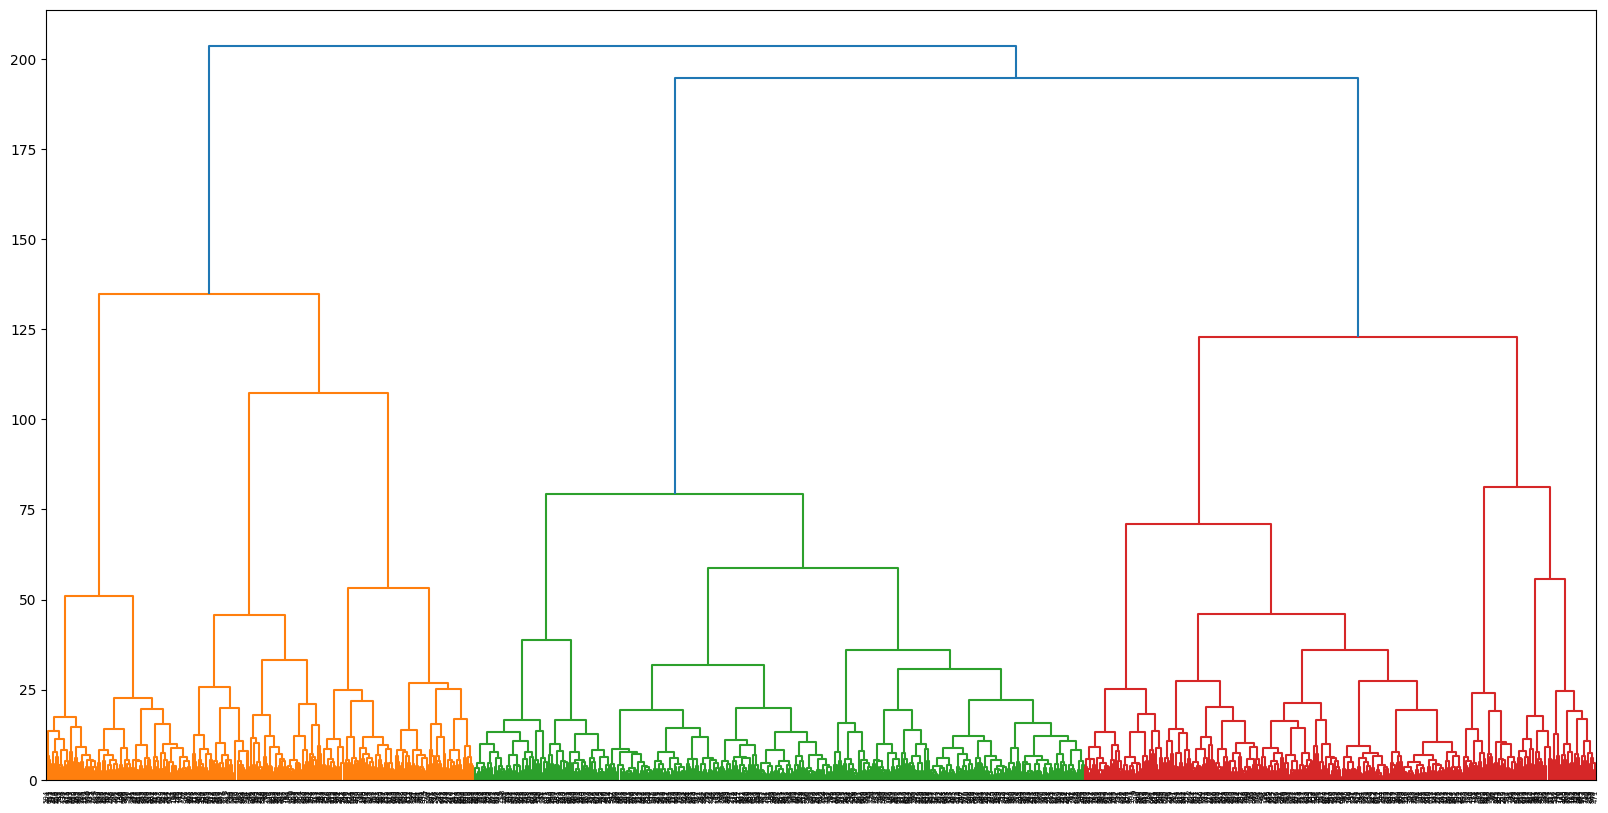

In [17]:
import scipy.cluster.hierarchy as shc

# Giảm kích thước dữ liệu bằng cách lấy mẫu ngẫu nhiên
sampled_data = data_pca_df.sample(n=1000, random_state=42)  

X_sampled = sampled_data.iloc[:, :-1].values

# hierarchical clustering
plt.figure(figsize=(20, 10))
linkage_matrix = shc.linkage(X_sampled, method='ward')
dend = shc.dendrogram(linkage_matrix)
plt.show()

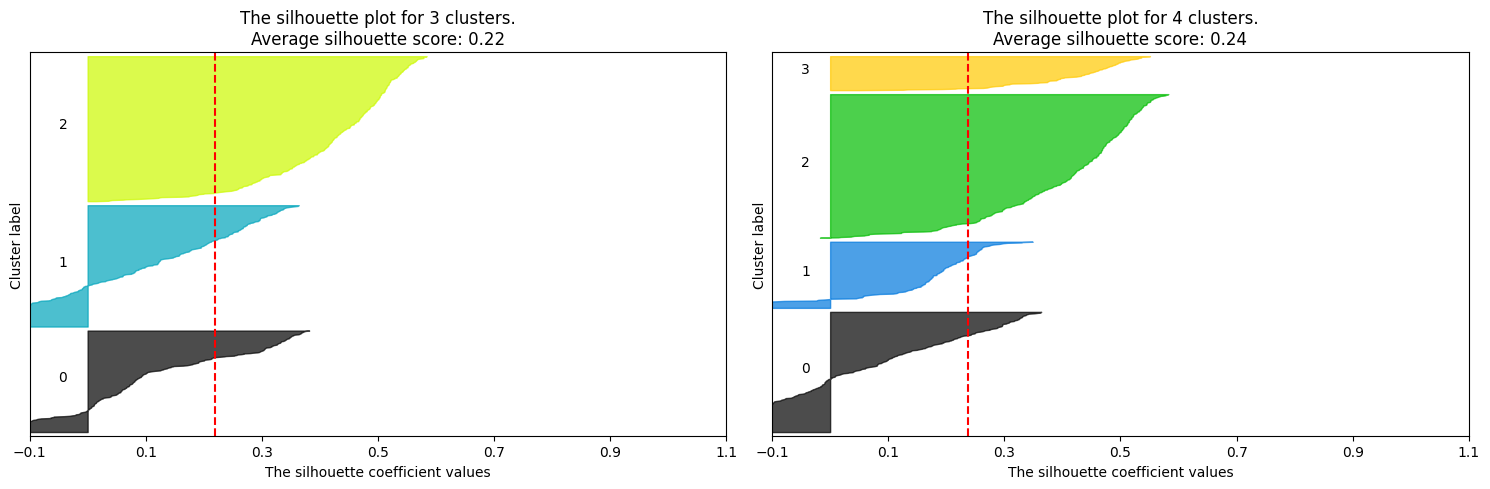

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

for k, axi in zip([3, 4], ax.flatten()):
    # Thực hiện phân cụm hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=k)
    cluster_labels = clustering.fit_predict(X_sampled)
    
    # Tính toán các giá trị silhouette
    silhouette_avg = silhouette_score(X_sampled, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_sampled, cluster_labels)
    import matplotlib.cm as cm
    
    y_lower = 10
    axi.set_xlim([-0.1, 1])
    axi.set_ylim([0, len(X_sampled) + (k + 1) * 10])
    axi.set_title(f"The silhouette plot for {k} clusters.\nAverage silhouette score: {silhouette_avg:.2f}")

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / k)
        axi.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        axi.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    axi.axvline(x=silhouette_avg, color="red", linestyle="--")
    axi.set_xlabel("The silhouette coefficient values")
    axi.set_ylabel("Cluster label")
    axi.set_yticks([])  # Clear the yaxis labels / ticks
    axi.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.tight_layout()
plt.show()

In [23]:
num_rows = data_pca_df.shape[0]
print(num_rows)
sample_size = int(0.5 * data_pca_df.shape[0])
print(sample_size)

61128
30564


In [27]:
# Random 500 dòng dữ liệu
random_rows = data_pca_df.sample(n=500, random_state=42)
# Random 2 thuộc tính
random_columns = np.random.choice(data_pca_df.columns, size=2, replace=False)
random_data = random_rows[random_columns]

print(random_data)

             8         12
33847 -0.818734  0.193245
29383 -0.719993  0.786011
3136  -0.318080  1.086521
10803  1.473016 -1.131492
1219  -0.572344 -0.307875
...         ...       ...
38569 -0.725260 -0.111103
10371 -0.791329 -0.293175
51983  0.486277 -0.154840
11547 -0.404535  0.568620
6724  -0.198169  0.565377

[500 rows x 2 columns]


In [28]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_std = scaler.fit_transform(random_data)
print(X_std)

[[-8.97771847e-01  4.23209288e-01]
 [-7.80496633e-01  1.60511959e+00]
 [-3.03139953e-01  2.20430447e+00]
 [ 1.82416284e+00 -2.21816964e+00]
 [-6.05131870e-01 -5.75966969e-01]
 [-6.17484821e-01  1.47848795e+00]
 [ 1.24258885e+00  9.41260852e-02]
 [-4.86634200e-01  2.42314083e+00]
 [-5.14205482e-01  7.67301046e-01]
 [-6.99455020e-01  7.91917966e-01]
 [ 2.31200070e+00  5.34154769e-01]
 [ 6.54683244e-01  1.32072506e+00]
 [-4.28364792e-01 -6.96104424e-01]
 [ 1.50029221e+00  1.19050742e+00]
 [ 2.08298789e-01 -7.57411979e-01]
 [ 1.39604955e+00 -9.45889318e-01]
 [-6.09874150e-01  1.68460747e+00]
 [-2.65402728e-01  4.76944604e-01]
 [-9.30832739e-02  5.59269333e-01]
 [ 1.04936728e+00 -4.29201449e-01]
 [-4.22721953e-01 -1.54921369e+00]
 [-8.11407217e-01 -1.27396640e+00]
 [ 3.08965661e-02  2.53496846e-01]
 [-1.48519087e+00  1.39182144e+00]
 [ 6.20742976e-02  6.12340179e-01]
 [-2.98631132e-01  1.82253399e+00]
 [-5.00664562e-01  4.78007623e-01]
 [-6.20031811e-01  2.40292073e-01]
 [-3.05448176e-01  7

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import numpy as np

# Tạo lưới tham số
param_grid_hc = {
    'n_clusters': [3, 4],
    'linkage': ['ward', 'complete', 'average'],
    'metric': ['euclidean', 'manhattan', 'l2']
}

# Tạo danh sách các tham số từ lưới tham số
grid = ParameterGrid(param_grid_hc)
best_score = -1
best_params = {}

# Tìm kiếm siêu tham số tốt nhất
for params in grid:
    if params['linkage'] == 'ward' and params['metric'] != 'euclidean':
        continue  # Bỏ qua việc tính toán nếu là linkage 'ward' và metric khác 'euclidean'
        
    hcluster = AgglomerativeClustering(**params)
    hcluster.fit(X_std)
    labels = hcluster.labels_
    if len(np.unique(labels)) > 1:  # Đảm bảo có ít nhất hai cụm được phân chia
        silhouette_avg = silhouette_score(X_std, labels)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = params

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)



Best parameters: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 4}
Best silhouette score: 0.4090608691812196


In [33]:
from sklearn.cluster import AgglomerativeClustering

# Thực hiện phân cụm hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
cluster_labels = hcluster.fit_predict(X_std)

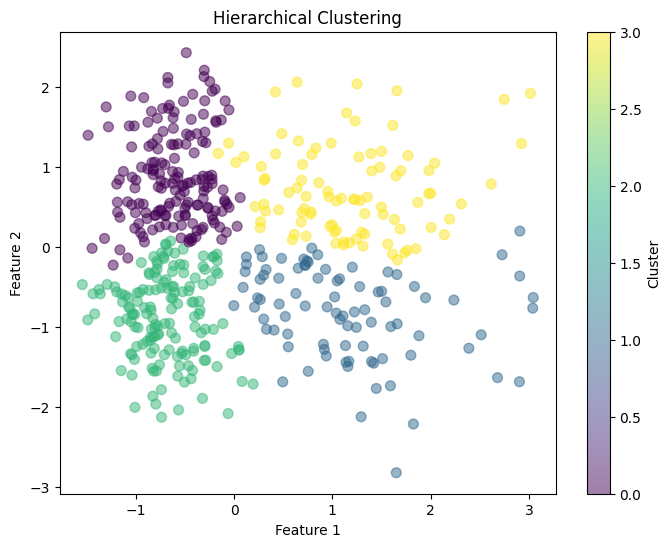

In [35]:
import matplotlib.pyplot as plt

# Trực quan hóa dữ liệu lên biểu đồ scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()
